In [13]:
# importing Libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
#filtering for the job titles and country, in my case Poland
df_PL = df[(df['job_country'] == 'Poland')].dropna(subset=['salary_year_avg'])

In [26]:
job_titles = df_PL['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Senior Data Scientist']

In [16]:
df_PL_top6 = df_PL[df_PL['job_title_short'].isin(job_titles)]

job_order = df_PL_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

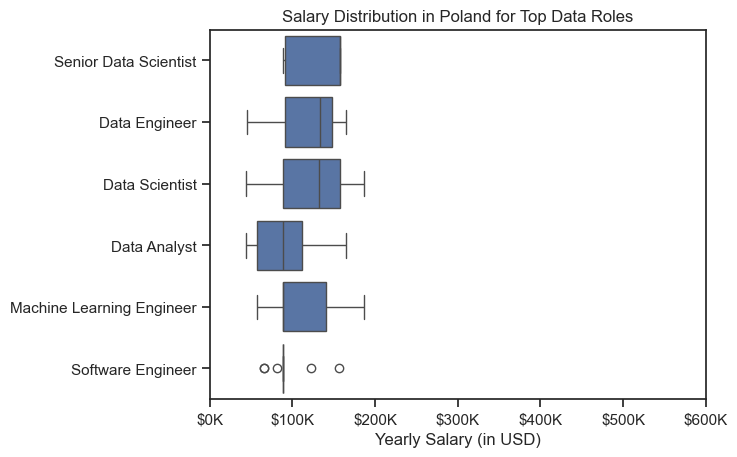

In [17]:
sns.boxplot(data = df_PL_top6, x='salary_year_avg', y='job_title_short', order = job_order)
sns.set_theme(style = 'ticks')

plt.title('Salary Distribution in Poland for Top Data Roles')
plt.xlabel('Yearly Salary (in USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [28]:
print(type(job_titles))
print(job_titles)

<class 'list'>
['Data Engineer', 'Data Analyst', 'Data Scientist', 'Machine Learning Engineer', 'Software Engineer', 'Senior Data Scientist']


In [29]:
#removing Software Engineer role due to low sample size
if 'Software Engineer' in job_titles:
    job_titles.remove('Software Engineer')
#creating refreshed data frame without Software Engineer role
df_PL_top5 = df_PL[df_PL['job_title_short'].isin(job_titles)]
job_order = df_PL_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

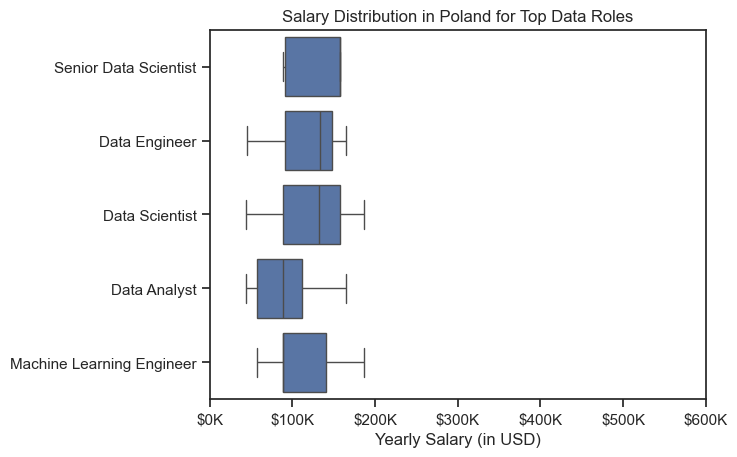

In [30]:
#creating new plot without Software Engineer role

sns.boxplot(data = df_PL_top5, x='salary_year_avg', y='job_title_short', order = job_order)
sns.set_theme(style = 'ticks')

plt.title('Salary Distribution in Poland for Top Data Roles')
plt.xlabel('Yearly Salary (in USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [32]:
df_DA_PL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

df_DA_PL = df_DA_PL.dropna(subset=['salary_year_avg'])

In [ ]:
df_DA_PL = df_DA_PL.explode('job_skills')

df_DA_PL[['salary_year_avg', 'job_skills']].head()


,salary_year_avg,job_skills
1490,43200.0,gdpr
1490,43200.0,sap
1490,43200.0,powerpoint
1490,43200.0,excel
6567,56700.0,r


In [46]:
df_DA_top_pay = df_DA_PL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
aws,1,165000.0
mongo,1,165000.0
linux,1,165000.0
hadoop,2,133750.0
nosql,2,131750.0
looker,6,111175.0
jira,1,111175.0
spark,8,111175.0
airflow,5,111175.0


In [44]:
df_DA_skills = df_DA_PL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count' , ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by = 'median', ascending=False)

df_DA_skills

,count,median
job_skills,,
tableau,13,111175.0
spark,8,111175.0
looker,6,111175.0
windows,5,111175.0
airflow,5,111175.0
gcp,10,106837.5
sql,26,102500.0
python,15,102500.0
power bi,8,82350.0


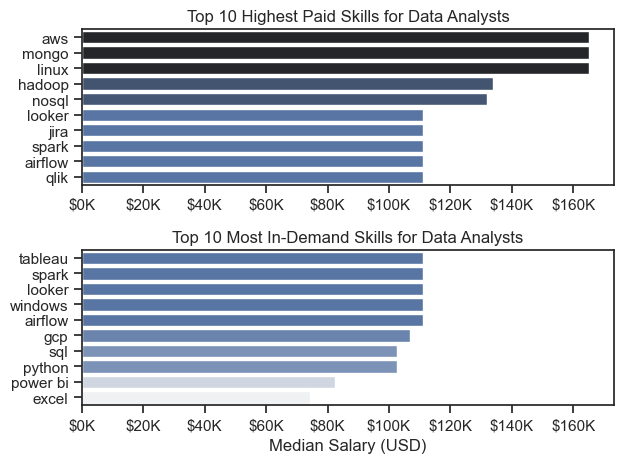

In [45]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()